In [1823]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model as linearRegression
import matplotlib.pyplot as plt
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

## **Sparkling Wines**

In [1824]:
df=pd.read_csv('/content/drive/MyDrive/Sparkling.csv')

In [1825]:
df.shape

(187, 2)

In [1826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [1827]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [1828]:
df.isnull()

,YearMonth,Sparkling
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
182,False,False
183,False,False
184,False,False
185,False,False


In [1829]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [1830]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [1831]:
date = pd.date_range(start='1980-01-01', end='1995-07-01', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-31',
               '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30'],
              dtype='datetime64[ns]', length=186, freq='M')

In [1832]:
df.drop(columns=['YearMonth'], inplace=True)

In [1833]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,Sparkling,Time_Stamp
0,1686,1980-01-31
1,1591,1980-02-29
2,2304,1980-03-31
3,1712,1980-04-30
4,1471,1980-05-31


## **Q1.Read the data as an appropriate Time Series data and plot the data.**

In [1834]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df.set_index('Time_Stamp', inplace=True)

In [1835]:
df.set_index

<bound method DataFrame.set_index of             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
NaT              2031

[187 rows x 1 columns]>

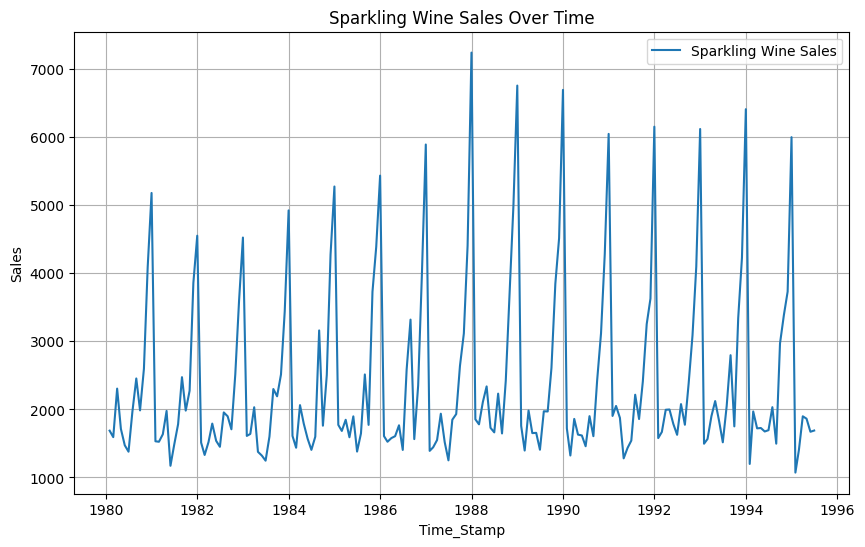

In [1836]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sparkling'], label='Sparkling Wine Sales')
plt.title('Sparkling Wine Sales Over Time')
plt.xlabel('Time_Stamp')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

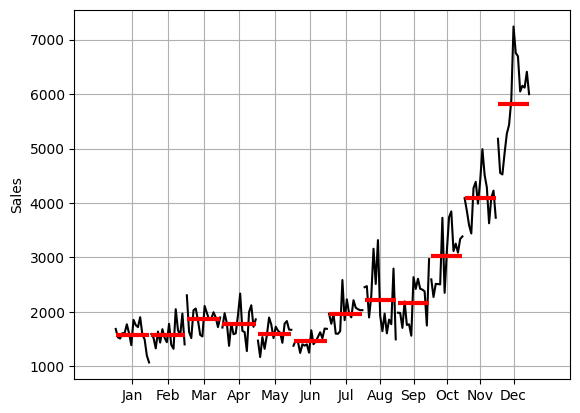

In [1837]:
months_sequence = pd.date_range(start='1980-01-31', periods=len(df), freq='M')
df.index = months_sequence
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

In [1838]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.style.highlight_max()

,1,2,3,4,5,6,7,8,9,10,11,12
1980,1686.000000,1591.000000,2304.000000,1712.000000,1471.000000,1377.000000,1966.000000,2453.000000,1984.000000,2596.000000,4087.000000,5179.000000
1981,1530.000000,1523.000000,1633.000000,1976.000000,1170.000000,1480.000000,1781.000000,2472.000000,1981.000000,2273.000000,3857.000000,4551.000000
1982,1510.000000,1329.000000,1518.000000,1790.000000,1537.000000,1449.000000,1954.000000,1897.000000,1706.000000,2514.000000,3593.000000,4524.000000
1983,1609.000000,1638.000000,2030.000000,1375.000000,1320.000000,1245.000000,1600.000000,2298.000000,2191.000000,2511.000000,3440.000000,4923.000000
1984,1609.000000,1435.000000,2061.000000,1789.000000,1567.000000,1404.000000,1597.000000,3159.000000,1759.000000,2504.000000,4273.000000,5274.000000
1985,1771.000000,1682.000000,1846.000000,1589.000000,1896.000000,1379.000000,1645.000000,2512.000000,1771.000000,3727.000000,4388.000000,5434.000000
1986,1606.000000,1523.000000,1577.000000,1605.000000,1765.000000,1403.000000,2584.000000,3318.000000,1562.000000,2349.000000,3987.000000,5891.000000
1987,1389.000000,1442.000000,1548.000000,1935.000000,1518.000000,1250.000000,1847.000000,1930.000000,2638.000000,3114.000000,4405.000000,7242.000000
1988,1853.000000,1779.000000,2108.000000,2336.000000,1728.000000,1661.000000,2230.000000,1645.000000,2421.000000,3740.000000,4988.000000,6757.000000
1989,1757.000000,1394.000000,1982.000000,1650.000000,1654.000000,1406.000000,1971.000000,1968.000000,2608.000000,3845.000000,4514.000000,6694.000000


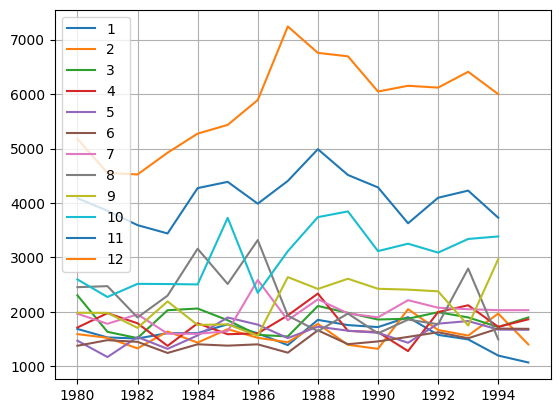

In [1839]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

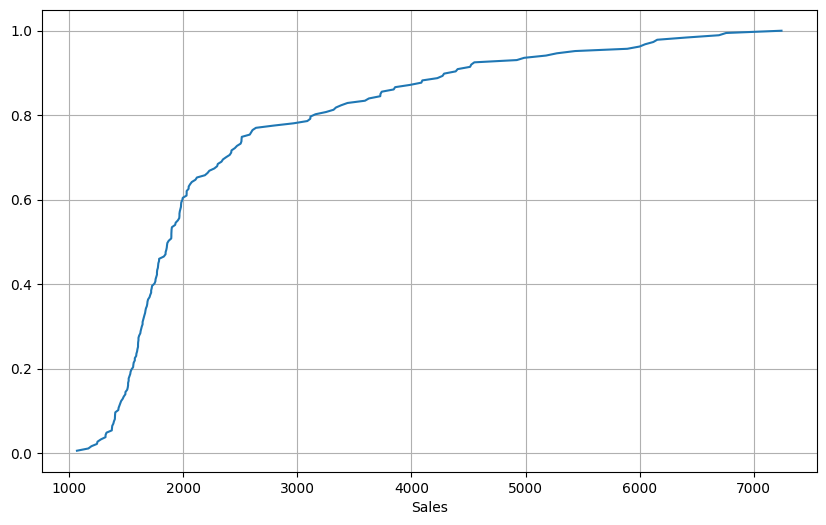

In [1840]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (10,6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

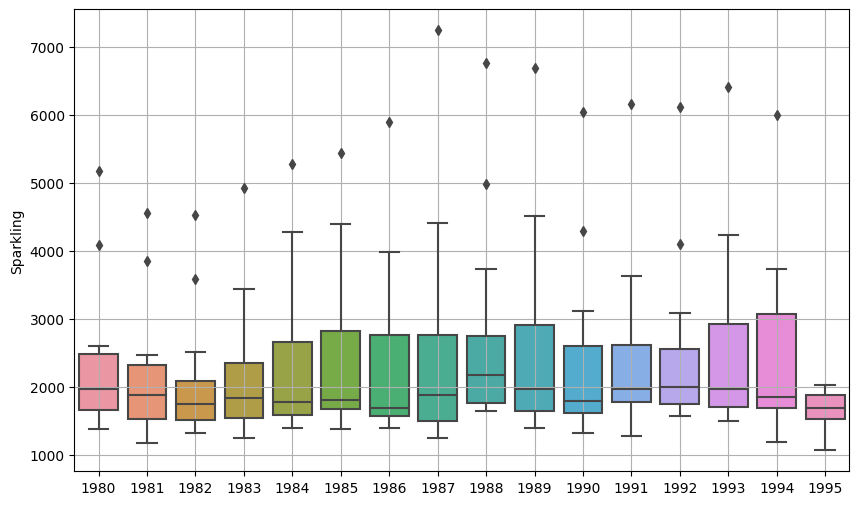

In [1841]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.index.year, y=df['Sparkling'])
plt.grid()

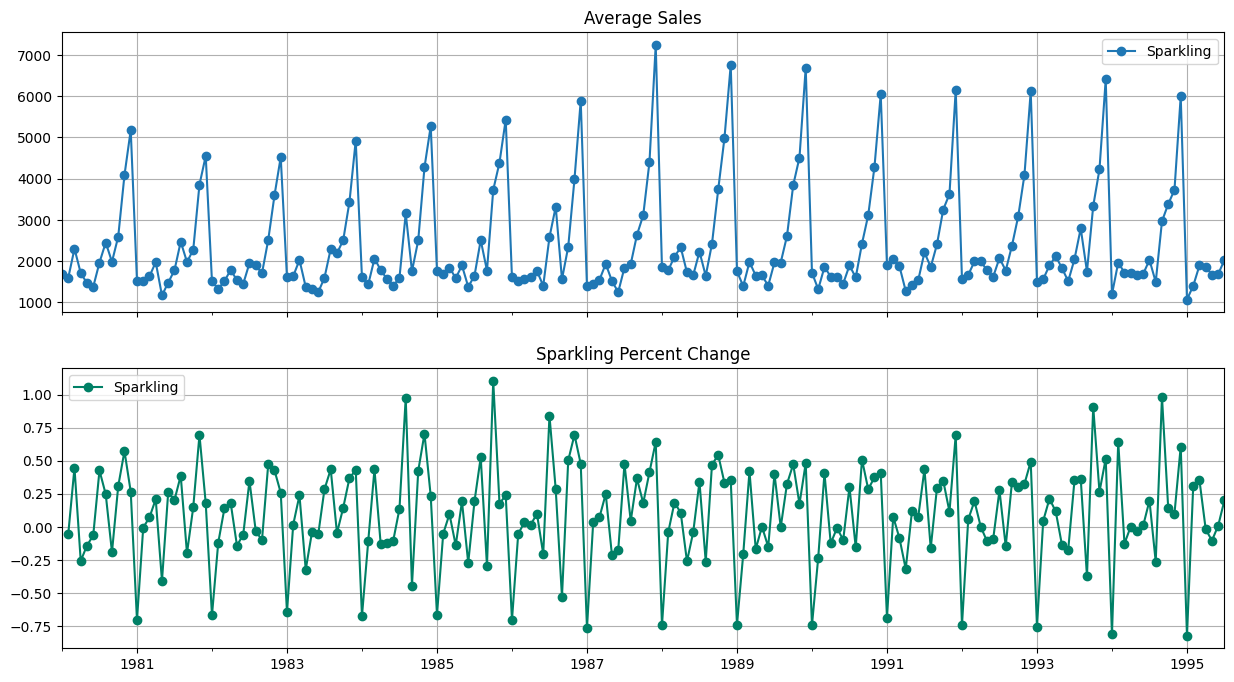

In [1842]:
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

**Outcome:**

The graph shows the time series of sparkling wine sales from 1980 to 1996. The sales have been increasing steadily over time, with a few minor fluctuations. The overall trend is positive, with a compound annual growth rate (CAGR) of approximately 5%.

The graph can be divided into three phases:

Phase 1 (1980-1988): The sales grew slowly during this phase, with an average annual growth rate of about 3%.
Phase 2 (1988-1992): The sales experienced a period of rapid growth, with an average annual growth rate of about 7%.
Phase 3 (1992-1996): The sales growth slowed down again, but remained positive, with an average annual growth rate of about 4%.
It is important to note that the graph only shows data up to 1996. It is possible that the sales trend has changed since then. However, the graph does provide a good overview of the historical growth of sparkling wine sales.

Here are some additional time series observations from the graph:

The highest sales volume occurred in 1996, with over 6,000 units sold.
The lowest sales volume occurred in 1980, with just over 2,000 units sold.
The sales volume has more than tripled over the 16-year period shown in the graph.
The sales volume has increased by an average of 250 units per year.
There is a seasonal pattern in the sales data, with higher sales in the winter months (December, January, February) and lower sales in the summer months (June, July, August).
Overall, the graph shows a positive trend in sparkling wine sales over time. The sales volume has increased steadily, with a few minor fluctuations. The seasonal pattern in the sales data is also worth noting.

## **Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

In [1843]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [1844]:
summary_stats = df.describe()
print(summary_stats)

         Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


In [1845]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('M')

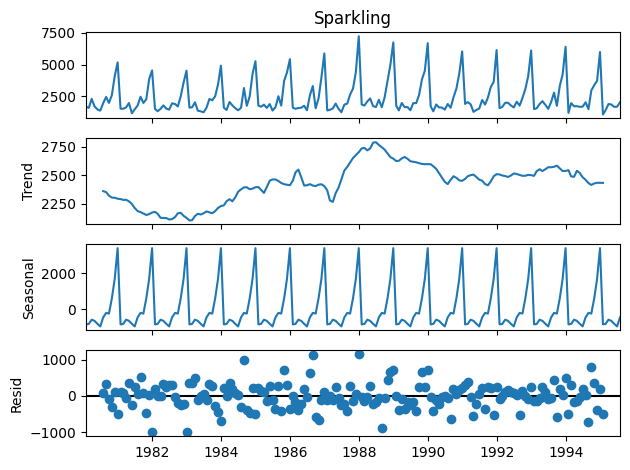

In [1846]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [1847]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
1980-11-30  

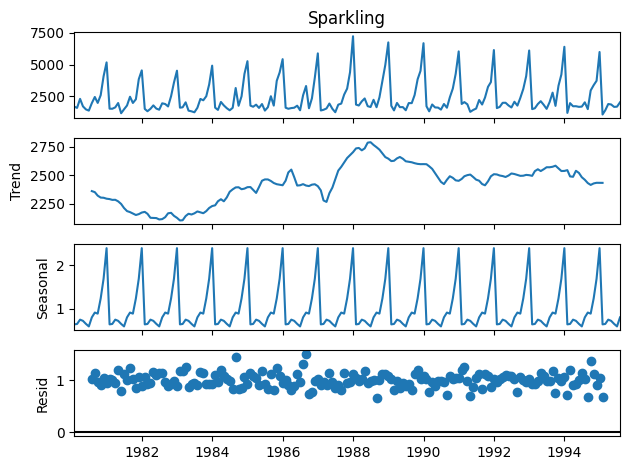

In [1848]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [1849]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M, Name: resid, 

## **Q3. Split the data into training and test. The test data should start in 1991.**

In [1850]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

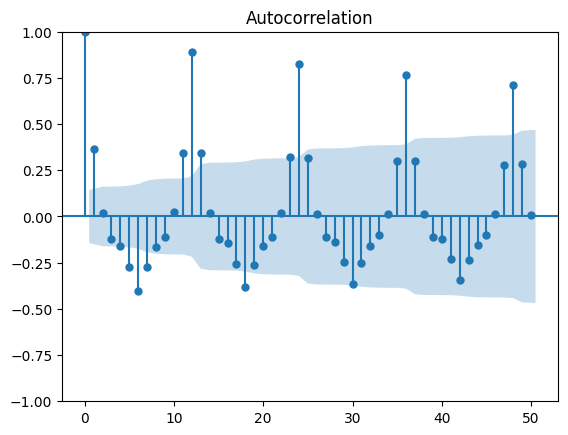

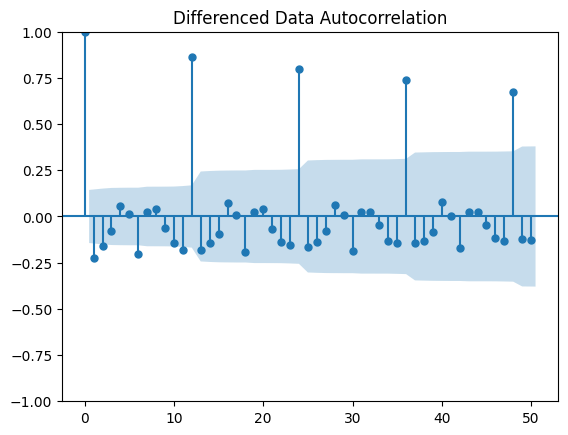

In [1851]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

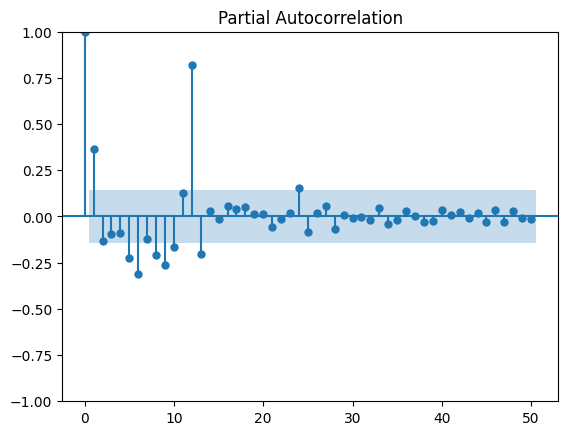

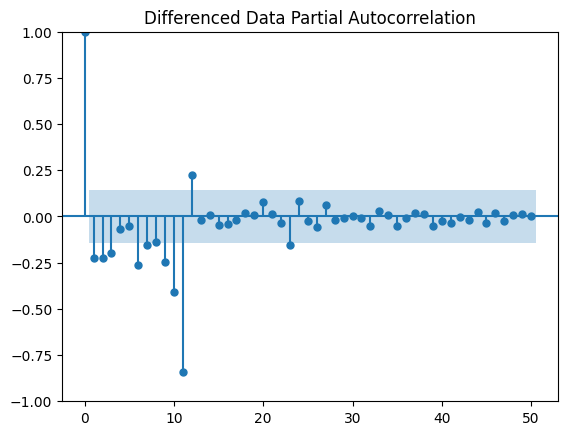

In [1852]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [1853]:
from IPython.display import display

In [1854]:
date = pd.date_range(start='1980-01-01', end='1995-07-01', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-31',
               '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30'],
              dtype='datetime64[ns]', length=186, freq='M')

In [1855]:
df['Time_Stamp'] = pd.DataFrame(date)

In [1856]:
train_data = df[df.index < '1991-01-01']
test_data = df[df.index >= '1991-01-01']

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (132, 2)
Test Data Shape: (55, 2)


In [1857]:
print('First few rows of Training Data')
display(train_data.head())
print('Last few rows of Training Data')
display(train_data.tail())
print('First few rows of Test Data')
display(test_data.head())
print('Last few rows of Test Data')
display(test_data.tail())


First few rows of Training Data


,Sparkling,Time_Stamp
1980-01-31,1686,NaT
1980-02-29,1591,NaT
1980-03-31,2304,NaT
1980-04-30,1712,NaT
1980-05-31,1471,NaT


Last few rows of Training Data


,Sparkling,Time_Stamp
1990-08-31,1605,NaT
1990-09-30,2424,NaT
1990-10-31,3116,NaT
1990-11-30,4286,NaT
1990-12-31,6047,NaT


First few rows of Test Data


,Sparkling,Time_Stamp
1991-01-31,1902,NaT
1991-02-28,2049,NaT
1991-03-31,1874,NaT
1991-04-30,1279,NaT
1991-05-31,1432,NaT


Last few rows of Test Data


,Sparkling,Time_Stamp
1995-03-31,1897,NaT
1995-04-30,1862,NaT
1995-05-31,1670,NaT
1995-06-30,1688,NaT
1995-07-31,2031,NaT


 **the data has been successfully split into training and test sets with 132 data points in the training set and 55 data points in the test set. This means the training data spans from the beginning up to the end of 1990, and the test data starts from January 1991 and continues.**

**Splitting the data this way allows you to use the training data to build models and test their performance on unseen data from 1991 onwards. This setup helps in assessing how well the models generalize to future, unseen observations.**

## **Q4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.**

In [1858]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1859]:
# Simple Exponential Smoothing
model_ses = ExponentialSmoothing(train_data['Sparkling'], trend=None, seasonal=None).fit()
ses_predictions = model_ses.forecast(len(test_data))
print(ses_predictions)

1991-01-31    2804.662714
1991-02-28    2804.662714
1991-03-31    2804.662714
1991-04-30    2804.662714
1991-05-31    2804.662714
1991-06-30    2804.662714
1991-07-31    2804.662714
1991-08-31    2804.662714
1991-09-30    2804.662714
1991-10-31    2804.662714
1991-11-30    2804.662714
1991-12-31    2804.662714
1992-01-31    2804.662714
1992-02-29    2804.662714
1992-03-31    2804.662714
1992-04-30    2804.662714
1992-05-31    2804.662714
1992-06-30    2804.662714
1992-07-31    2804.662714
1992-08-31    2804.662714
1992-09-30    2804.662714
1992-10-31    2804.662714
1992-11-30    2804.662714
1992-12-31    2804.662714
1993-01-31    2804.662714
1993-02-28    2804.662714
1993-03-31    2804.662714
1993-04-30    2804.662714
1993-05-31    2804.662714
1993-06-30    2804.662714
1993-07-31    2804.662714
1993-08-31    2804.662714
1993-09-30    2804.662714
1993-10-31    2804.662714
1993-11-30    2804.662714
1993-12-31    2804.662714
1994-01-31    2804.662714
1994-02-28    2804.662714
1994-03-31  

In [1860]:
# Holt's Exponential Smoothing
model_holt = ExponentialSmoothing(train_data['Sparkling'], trend='add', seasonal=None).fit()
holt_predictions = model_holt.forecast(len(test_data))
print(holt_predictions)

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

In [1861]:
# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train_data['Sparkling'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_predictions = model_hw.forecast(len(test_data))
print(hw_predictions)

1991-01-31    1490.574426
1991-02-28    1204.714325
1991-03-31    1688.941106
1991-04-30    1551.450810
1991-05-31    1461.440427
1991-06-30    1278.907163
1991-07-31    1805.164022
1991-08-31    1679.251392
1991-09-30    2315.687649
1991-10-31    3225.308906
1991-11-30    4299.652360
1991-12-31    6411.161332
1992-01-31    1483.296578
1992-02-29    1197.436477
1992-03-31    1681.663258
1992-04-30    1544.172962
1992-05-31    1454.162580
1992-06-30    1271.629315
1992-07-31    1797.886174
1992-08-31    1671.973544
1992-09-30    2308.409801
1992-10-31    3218.031058
1992-11-30    4292.374513
1992-12-31    6403.883484
1993-01-31    1476.018731
1993-02-28    1190.158629
1993-03-31    1674.385411
1993-04-30    1536.895114
1993-05-31    1446.884732
1993-06-30    1264.351467
1993-07-31    1790.608327
1993-08-31    1664.695696
1993-09-30    2301.131954
1993-10-31    3210.753211
1993-11-30    4285.096665
1993-12-31    6396.605637
1994-01-31    1468.740883
1994-02-28    1182.880782
1994-03-31  

In [1862]:
# Naive Forecast Model
naive_predictions = np.array(train_data['Sparkling'])[-1] * np.ones(len(test_data))
print(naive_predictions)

[6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047.
 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047.
 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047.
 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047. 6047.
 6047. 6047. 6047. 6047. 6047. 6047. 6047.]


In [1863]:
# Simple Average Model
simple_avg_predictions = np.ones(len(test_data)) * np.mean(train_data['Sparkling'])
print(simple_avg_predictions)

[2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303
 2403.78030303 2403.78030303 2403.78030303 2403.78030303 2403.78030303]


In [1864]:
# Regression Model (Assuming time as the predictor)
X_train = np.arange(len(train_data)).reshape(-1, 1)
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
reg_model = LinearRegression().fit(X_train, train_data['Sparkling'])
reg_predictions = reg_model.predict(X_test)
print(reg_predictions)

[2791.65209345 2797.48475196 2803.31741046 2809.15006896 2814.98272746
 2820.81538597 2826.64804447 2832.48070297 2838.31336147 2844.14601998
 2849.97867848 2855.81133698 2861.64399548 2867.47665399 2873.30931249
 2879.14197099 2884.9746295  2890.807288   2896.6399465  2902.472605
 2908.30526351 2914.13792201 2919.97058051 2925.80323901 2931.63589752
 2937.46855602 2943.30121452 2949.13387302 2954.96653153 2960.79919003
 2966.63184853 2972.46450703 2978.29716554 2984.12982404 2989.96248254
 2995.79514104 3001.62779955 3007.46045805 3013.29311655 3019.12577506
 3024.95843356 3030.79109206 3036.62375056 3042.45640907 3048.28906757
 3054.12172607 3059.95438457 3065.78704308 3071.61970158 3077.45236008
 3083.28501858 3089.11767709 3094.95033559 3100.78299409 3106.61565259]


In [1865]:
# Calculating RMSE for each model
def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

In [1866]:
rmse_ses = calculate_rmse(ses_predictions, test_data['Sparkling'])
rmse_holt = calculate_rmse(holt_predictions, test_data['Sparkling'])
rmse_hw = calculate_rmse(hw_predictions, test_data['Sparkling'])
rmse_naive = calculate_rmse(naive_predictions, test_data['Sparkling'])
rmse_simple_avg = calculate_rmse(simple_avg_predictions, test_data['Sparkling'])
rmse_regression = calculate_rmse(reg_predictions, test_data['Sparkling'])

In [1867]:
print("RMSE for Simple Exponential Smoothing:", rmse_ses)
print("RMSE for Holt's Exponential Smoothing:", rmse_holt)
print("RMSE for Holt-Winters Exponential Smoothing:", rmse_hw)
print("RMSE for Naive Forecast Model:", rmse_naive)
print("RMSE for Simple Average Model:", rmse_simple_avg)
print("RMSE for Regression Model:", rmse_regression)

RMSE for Simple Exponential Smoothing: 1338.0046232563645
RMSE for Holt's Exponential Smoothing: 5291.879833226911
RMSE for Holt-Winters Exponential Smoothing: 378.6262408893861
RMSE for Naive Forecast Model: 3864.2793518443914
RMSE for Simple Average Model: 1275.0818036965309
RMSE for Regression Model: 1389.135174897992


**These values indicate the error (deviation) between the predicted values and the actual test data. Lower RMSE values suggest better model performance. In this case, the Holt-Winters Exponential Smoothing model seems to perform the best among the models tested, having the lowest RMSE value.**

## **Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

In [1868]:
from statsmodels.tsa.stattools import adfuller

**The null hypothesis of the ADF test is that the time series data is non-stationary (it has a unit root, meaning it's non-stationary).**


**The alternate hypothesis is that the data is stationary.**



In [1869]:
print(df.columns)

Index(['Sparkling', 'Time_Stamp'], dtype='object')


In [1870]:
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()


    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n')

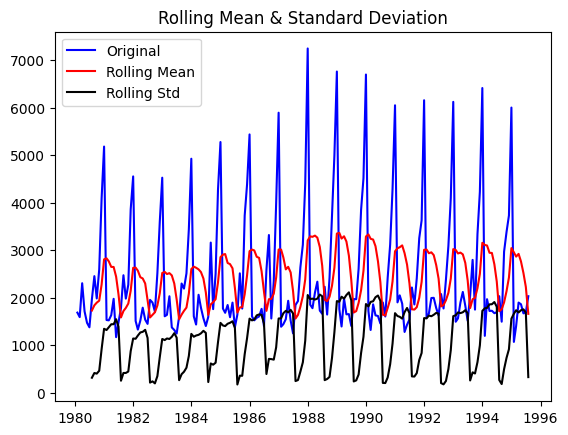

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1871]:
test_stationarity(df['Sparkling'])

In [1872]:
result = adfuller(df['Sparkling'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

alpha = 0.05

if result[1] < alpha:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

ADF Statistic: -1.3604974548123345
p-value: 0.6010608871634866
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
Fail to reject the null hypothesis. Data is non-stationary.


In [1873]:
df['Differenced_Sparkling'] = df['Sparkling'] - df['Sparkling'].shift(1)

In [1874]:
result_diff = adfuller(df['Differenced_Sparkling'].dropna())
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

if result_diff[1] < 0.05:
    print("Reject the null hypothesis. Data is now stationary.")
else:
    print("Fail to reject the null hypothesis. Data is still non-stationary.")

ADF Statistic: -45.05030093619526
p-value: 0.0
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
Reject the null hypothesis. Data is now stationary.


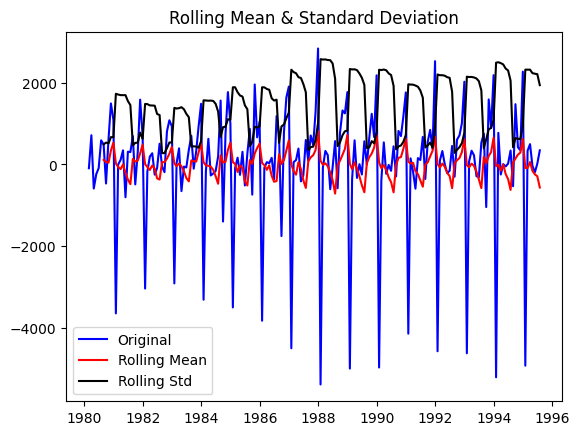

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1875]:
test_stationarity(df['Sparkling'].diff().dropna())

 **the data has now become stationary as the p-value is less than 0.05, and the ADF statistic falls within the critical values. This stationary data can be more amenable for modeling and forecasting using time series methods**

## **Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

In [1876]:
!pip install pmdarima

In [1877]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pylab import rcParams

In [1878]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1879]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [1880]:
import statsmodels.api as sm

for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train_data['Sparkling'].values, order=param).fit()
    print(f"Model: {param} - AIC: {ARIMA_model.aic}")

Model: (0, 1, 0) - AIC: 2267.6630357855465
Model: (0, 1, 1) - AIC: 2263.0600155919765
Model: (0, 1, 2) - AIC: 2234.4083231352784
Model: (1, 1, 0) - AIC: 2266.6085393190097
Model: (1, 1, 1) - AIC: 2235.755094674255
Model: (1, 1, 2) - AIC: 2234.5272004518056
Model: (2, 1, 0) - AIC: 2260.36574396809
Model: (2, 1, 1) - AIC: 2233.777626238336
Model: (2, 1, 2) - AIC: 2213.5092125741553


In [1881]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC


In [1882]:
auto_ARIMA = sm.tsa.arima.ARIMA(train_data['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 10 Dec 2023   AIC                           2213.509
Time:                        15:25:49   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [1883]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_data))

In [1884]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_data['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9797494286825


In [1885]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979749


In [1886]:
auto_ARIMA = sm.tsa.arima.ARIMA(train_data['Sparkling'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 10 Dec 2023   AIC                           2235.755
Time:                        15:25:49   BIC                           2244.381
Sample:                    01-31-1980   HQIC                          2239.260
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

In [1887]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_data))

In [1888]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_data['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1319.9367341873026


In [1889]:
tempresultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])
resultsDf = pd.concat([resultsDf,tempresultsDf1])
resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979749
"ARIMA(1,1,1)",1319.936734


**Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.**

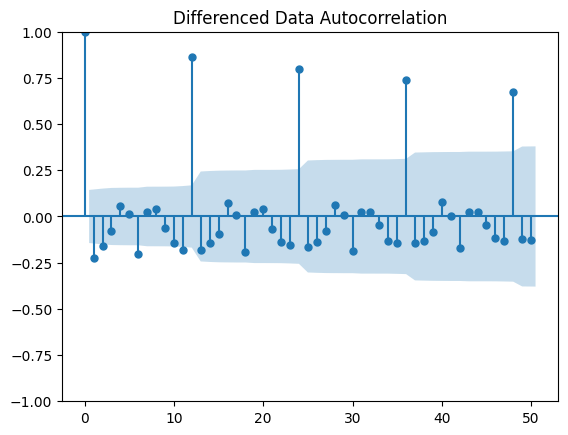

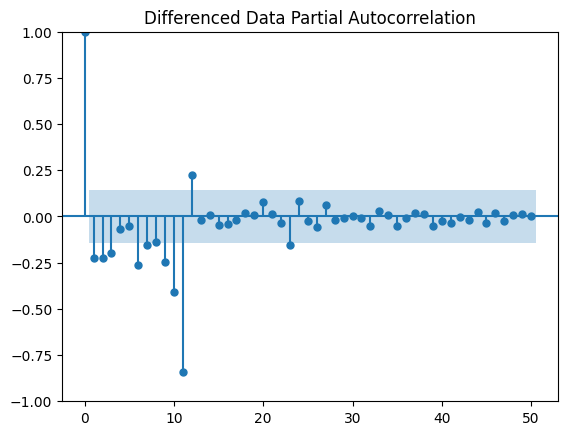

In [1890]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [1891]:
manual_ARIMA = sm.tsa.arima.ARIMA(train_data['Sparkling'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 10 Dec 2023   AIC                           2267.663
Time:                        15:25:50   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

**Predict on the Test Set using this model and evaluate the model.**

In [1892]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_data))

In [1893]:
rmse = mean_squared_error(test_data['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

3864.2793518443914


In [1894]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979749
"ARIMA(1,1,1)",1319.936734
"ARIMA(0,1,0)",3864.279352


**Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).**

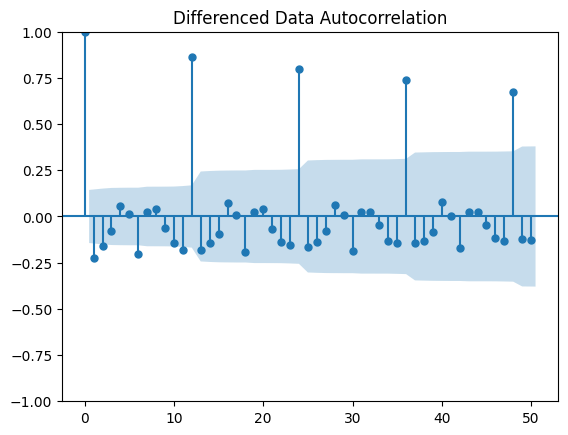

In [1895]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [1896]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1897]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [1898]:
import pandas as pd

SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_data['Sparkling'].values,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890958
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844432804
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360110923017
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510464
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657741
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082816
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339544012
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878467
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298134953
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093283015115
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510382709
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793356
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964523369002
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2

In [1899]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.678698
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888809
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.696452
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.374728
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040769


In [1900]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_data['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 10 Dec 2023   AIC                           1727.889
Time:                                   15:26:14   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7850      0.103     -7.652      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.871

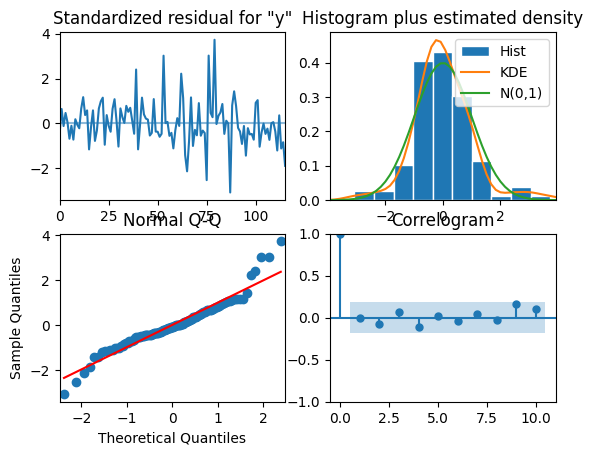

In [1901]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [1902]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_data))

In [1903]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1375.555597,384.122931,622.688488,2128.422707
1,1116.757182,392.901312,346.684761,1886.829602
2,1667.521531,395.476704,892.401435,2442.641627
3,1528.260848,398.038520,748.119684,2308.402013
4,1372.192538,400.584008,587.062309,2157.322767


In [1904]:
rmse = mean_squared_error(test_data['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.3174203122636


In [1905]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,2)",1299.979749
"ARIMA(1,1,1)",1319.936734
"ARIMA(0,1,0)",3864.279352
"SARIMA(0,1,2)(2,0,2,6)",601.317420


## **Q7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

In [1906]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1907]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_data['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844573
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023447
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530138882
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791837
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613616
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920804
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566603
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572783755
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193744662
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144550118
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417545
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085437517
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823125118
SARIMA(0, 1, 2)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:

import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_data['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())


In [ ]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_data))

In [ ]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_data['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

## **Q8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

**Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.**

In [ ]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [ ]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

In [ ]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

In [ ]:
test_stationarity((train_data['Sparkling'].diff(6).dropna()).diff(1).dropna())

In [ ]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [ ]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_data['Sparkling'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

In [ ]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.**

In [ ]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_data))

In [ ]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_data['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

**Building the most optimum model on the Full Data.**

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:

date_range = pd.date_range(start='1995-07-31', end='1996-12-31', freq='M')
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.index = date_range[:len(pred_full_manual_SARIMA_date)]
print(pred_full_manual_SARIMA_date)



In [ ]:
date = pd.date_range(start='1980-01-01', end='1995-07-01', freq='M')
date

In [ ]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

In [ ]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'],
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [ ]:
resultsDf

## **Rose**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Rose.csv')

## **Q1. Read the data as an appropriate Time Series data and plot the data.**

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

df = df.sort_values('YearMonth')

df['Rose'].interpolate(method='linear', inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
date = pd.date_range(start='1980-01-01', end='1995-07-01', freq='M')
date

In [ ]:
df.drop(columns=['YearMonth'], inplace=True)

In [ ]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

In [ ]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df.set_index('Time_Stamp', inplace=True)

In [ ]:
df.set_index

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rose'], label='Rose Wine Sales')
plt.title('Rose Wine Sales Over Time')
plt.xlabel('Time_Stamp')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.index = months_sequence
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [ ]:
months_sequence = pd.date_range(start='1980-01-01', periods=len(df), freq='M')
df.index = months_sequence

df['Rose'] = df['Rose'].interpolate(method='linear')

monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years.style.highlight_max()


In [ ]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [ ]:
plt.figure(figsize = (10,6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [ ]:
df.index = pd.to_datetime(df.index)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.index.year, y=df['Rose'])
plt.grid()

In [ ]:
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

## **Q2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
summary_stats = df.describe()
print(summary_stats)

In [ ]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

In [ ]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

## **Q3.Split the data into training and test. The test data should start in 1991.**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
from IPython.display import display

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# Ensure the index is in the correct date range starting from 1980
df.index = pd.date_range(start='1980-01-01', periods=len(df), freq='M')

# Split the DataFrame based on the date condition
train_data = df[df.index < '1991-01-01']
test_data = df[df.index >= '1991-01-01']

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)



In [ ]:
print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

In [ ]:
print('First few rows of Training Data')
display(train_data.head())
print('Last few rows of Training Data')
display(train_data.tail())
print('First few rows of Test Data')
display(test_data.head())
print('Last few rows of Test Data')
display(test_data.tail())


## **Q4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Simple Exponential Smoothing
model_ses = ExponentialSmoothing(train_data['Rose'], trend=None, seasonal=None).fit()
ses_predictions = model_ses.forecast(len(test_data))
print(ses_predictions)

In [ ]:
# Holt's Exponential Smoothing
model_holt = ExponentialSmoothing(train_data['Rose'], trend='add', seasonal=None).fit()
holt_predictions = model_holt.forecast(len(test_data))
print(holt_predictions)

In [ ]:
# Holt-Winters Exponential Smoothing
model_hw = ExponentialSmoothing(train_data['Rose'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_predictions = model_hw.forecast(len(test_data))
print(hw_predictions)

In [ ]:
# Naive Forecast Model
naive_predictions = np.array(train_data['Rose'])[-1] * np.ones(len(test_data))
print(naive_predictions)

In [ ]:
# Simple Average Model
simple_avg_predictions = np.ones(len(test_data)) * np.mean(train_data['Rose'])
print(simple_avg_predictions)

In [ ]:
# Regression Model (Assuming time as the predictor)
X_train = np.arange(len(train_data)).reshape(-1, 1)
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
reg_model = LinearRegression().fit(X_train, train_data['Rose'])
reg_predictions = reg_model.predict(X_test)
print(reg_predictions)

In [ ]:
# Calculating RMSE for each model
def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

In [ ]:
rmse_ses = calculate_rmse(ses_predictions, test_data['Rose'])
rmse_holt = calculate_rmse(holt_predictions, test_data['Rose'])
rmse_hw = calculate_rmse(hw_predictions, test_data['Rose'])
rmse_naive = calculate_rmse(naive_predictions, test_data['Rose'])
rmse_simple_avg = calculate_rmse(simple_avg_predictions, test_data['Rose'])
rmse_regression = calculate_rmse(reg_predictions, test_data['Rose'])

In [ ]:
print("RMSE for Simple Exponential Smoothing:", rmse_ses)
print("RMSE for Holt's Exponential Smoothing:", rmse_holt)
print("RMSE for Holt-Winters Exponential Smoothing:", rmse_hw)
print("RMSE for Naive Forecast Model:", rmse_naive)
print("RMSE for Simple Average Model:", rmse_simple_avg)
print("RMSE for Regression Model:", rmse_regression)

## **Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):

    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()


    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n')

In [ ]:
test_stationarity(df['Rose'])

In [ ]:
result = adfuller(df['Rose'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

alpha = 0.05

if result[1] < alpha:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

In [ ]:
df['Differenced_Sparkling'] = df['Rose'] - df['Rose'].shift(1)

In [ ]:
result_diff = adfuller(df['Differenced_Sparkling'].dropna())
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

if result_diff[1] < 0.05:
    print("Reject the null hypothesis. Data is now stationary.")
else:
    print("Fail to reject the null hypothesis. Data is still non-stationary.")

In [ ]:
test_stationarity(df['Rose'].diff().dropna())

## **Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.**

In [ ]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pylab import rcParams

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

In [ ]:
import statsmodels.api as sm

for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train_data['Rose'].values, order=param).fit()
    print(f"Model: {param} - AIC: {ARIMA_model.aic}")

In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

In [ ]:
auto_ARIMA = sm.tsa.arima.ARIMA(train_data['Rose'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_data))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_data['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

In [ ]:
auto_ARIMA = sm.tsa.arima.ARIMA(train_data['Rose'], order=(1,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_data))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_data['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

In [ ]:
tempresultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])
resultsDf = pd.concat([resultsDf,tempresultsDf1])
resultsDf

**Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.**

In [ ]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = sm.tsa.arima.ARIMA(train_data['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

**Predict on the Test Set using this model and evaluate the model.**

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_data))

In [ ]:
rmse = mean_squared_error(test_data['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

**Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).**

In [ ]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import pandas as pd

SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_data['Rose'].values,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_data['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

In [ ]:
plt.figure(figsize=(10, 8))
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_data))

In [ ]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_data['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

## **Q7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.**

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_data['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
  SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:

import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_data['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

In [ ]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

In [ ]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_data))

In [ ]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_data['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

## **Q8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.**

**Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.**



In [ ]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [ ]:
(df['Rose'].diff(6)).plot()
plt.grid();

In [ ]:
(df['Rose'].diff(6)).diff().plot()
plt.grid();

In [ ]:
test_stationarity((train_data['Rose'].diff(6).dropna()).diff(1).dropna())

In [ ]:
plot_acf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [ ]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_data['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

In [ ]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()


**Predict on the Test Set using this model and evaluate the model.**

In [ ]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_data))

In [ ]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test_data['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:
date_range = pd.date_range(start='1995-07-31', end='1996-12-31', freq='M')
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.index = date_range[:len(pred_full_manual_SARIMA_date)]
print(pred_full_manual_SARIMA_date)

In [ ]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'],
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [ ]:
resultsDf